<a href="https://colab.research.google.com/github/AsSakina/Code_Projects/blob/main/Data_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
#Importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import plot_confusion_matrix
#from sklearn.metrics import plot_roc_curve
#from sklearn.metrics import plot_precision_recall_curve
#from sklearn.metrics import plot_precision_recall_curve
#from sklearn.metrics import classification_report

#Data Explorer

In [ ]:
#Read the dataset
data = pd.read_csv("BrainTumor.csv")

In [ ]:
#Printout our dataset
data.head(15)

,Patient ID,Age,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome,Time to Recurrence (months),Recurrence Site,Survival Time (months)
0,1,45,Male,Glioblastoma,IV,Frontal lobe,Surgery,Partial response,10.0,Temporal lobe,18
1,2,55,Female,Meningioma,I,Parietal lobe,Surgery,Complete response,NaN,NaN,36
2,3,60,Male,Astrocytoma,III,Occipital lobe,Surgery + Chemotherapy,Progressive disease,14.0,Frontal lobe,22
3,4,50,Female,Glioblastoma,IV,Temporal lobe,Surgery + Radiation therapy,Complete response,NaN,NaN,12
4,5,65,Male,Astrocytoma,II,Frontal lobe,Surgery + Radiation therapy,Partial response,24.0,Frontal lobe,48
5,6,45,Male,Glioblastoma,IV,Frontal lobe,Surgery,Partial response,10.0,Temporal lobe,18
6,7,55,Female,Meningioma,I,Parietal lobe,Surgery,Complete response,NaN,NaN,36
7,8,60,Male,Astrocytoma,III,Occipital lobe,Surgery + Chemotherapy,Progressive disease,14.0,Frontal lobe,22
8,9,50,Female,Glioblastoma,IV,Temporal lobe,Surgery + Radiation,Complete response,NaN,NaN,12
9,10,65,Male,Astrocytoma,II,Frontal lobe,Surgery + Radiation,Partial response,24.0,Frontal lobe,48


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Patient ID                   2000 non-null   int64  
 1   Age                          2000 non-null   int64  
 2   Gender                       2000 non-null   object 
 3   Tumor Type                   2000 non-null   object 
 4   Tumor Grade                  2000 non-null   object 
 5   Tumor Location               2000 non-null   object 
 6   Treatment                    2000 non-null   object 
 7   Treatment Outcome            2000 non-null   object 
 8   Time to Recurrence (months)  1438 non-null   float64
 9   Recurrence Site              1438 non-null   object 
 10  Survival Time (months)       2000 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 172.0+ KB


In [ ]:
data.describe()

,Patient ID,Age,Time to Recurrence (months),Survival Time (months)
count,2000.000000,2000.000000,1438.000000,2000.000000
mean,1000.500000,56.153000,16.099444,34.270000
std,577.494589,6.078492,3.128291,8.606343
min,1.000000,42.000000,6.000000,9.000000
25%,500.750000,51.000000,14.000000,28.000000
50%,1000.500000,56.000000,16.000000,36.000000
75%,1500.250000,61.000000,18.000000,42.000000
max,2000.000000,72.000000,36.000000,72.000000


#Check Correlations

In [ ]:

corr = data.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
corr.style.background_gradient(cmap='coolwarm')

,Patient ID,Age,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome,Time to Recurrence (months),Recurrence Site,Survival Time (months)
Patient ID,1.000000,0.011245,0.006617,0.009428,0.012453,0.000446,0.121525,0.122615,0.091896,0.029232,0.252532
Age,0.011245,1.000000,0.106011,0.077310,0.096063,0.046331,-0.091204,-0.025626,-0.002432,-0.060285,0.051450
Gender,0.006617,0.106011,1.000000,0.033552,0.080002,-0.067106,-0.080349,-0.246628,-0.032410,0.181991,-0.015544
Tumor Type,0.009428,0.077310,0.033552,1.000000,0.954004,0.042840,0.102227,0.321057,0.110654,0.130914,-0.038862
Tumor Grade,0.012453,0.096063,0.080002,0.954004,1.000000,0.090332,0.092813,0.278296,0.145116,0.193309,-0.020265
Tumor Location,0.000446,0.046331,-0.067106,0.042840,0.090332,1.000000,0.255883,-0.141462,-0.114121,-0.194240,-0.213707
Treatment,0.121525,-0.091204,-0.080349,0.102227,0.092813,0.255883,1.000000,0.063042,0.117011,0.073924,0.089576
Treatment Outcome,0.122615,-0.025626,-0.246628,0.321057,0.278296,-0.141462,0.063042,1.000000,0.124497,0.171802,0.175274
Time to Recurrence (months),0.091896,-0.002432,-0.032410,0.110654,0.145116,-0.114121,0.117011,0.124497,1.000000,0.573202,0.335360
Recurrence Site,0.029232,-0.060285,0.181991,0.130914,0.193309,-0.194240,0.073924,0.171802,0.573202,1.000000,0.274906


In [ ]:
#plotly.express.scatter(data_frame=None, x=None, y=None)
import plotly.express as px
fig = px.scatter(data, x='Tumor Grade', y='Tumor Type')
fig.show()

In [ ]:
#plotly.express.scatter(data_frame=None, x=None, y=None)
import plotly.express as px
fig = px.scatter(data, x='Gender', y='Survival Time (months)')
fig.show()

In [ ]:
#plotly.express.scatter(data_frame=None, x=None, y=None)
#import plotly.express as px
#fig = px.scatter(data, x='Time to Recurrence (months)', y='Recurrence Site')
# Add a lowess trendline (polynomial curve)
#fig.update_traces(trendline='lowess')
#fig.show()

#Handle Outliers

In [ ]:
#Handling with Outliers in our Datasets using boxplot
# Box Plot
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Box(y=data['Time to Recurrence (months)'])) # if the series is part of dataframe, df

fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Box(y=data['Survival Time (months)'])) # if the series is part of dataframe, df

fig.show()

In [ ]:
#Handling with Outliers in our Datasets using boxplot
# Box Plot
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Box(y=data['Age'])) # if the series is part of dataframe, df

fig.show()

In [ ]:
#Read the dataset
data = pd.read_csv("BrainTumor.csv")

#IQR

Q1 = np.percentile(data['Survival Time (months)'], 25)
Q3 = np.percentile(data['Survival Time (months)'], 75)
IQR = Q3 - Q1
threshold = 1.5

lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Identify outliers
outliers = (data['Survival Time (months)'] < lower_bound) | (data['Survival Time (months)'] > upper_bound)

# Remove outliers
data_cleaned = data[~outliers]
data = data_cleaned

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Box(y=data['Survival Time (months)'])) # if the series is part of dataframe, df

fig.show()

In [ ]:
#Read the dataset
data = pd.read_csv("BrainTumor.csv")

#IQR

Q1 = np.percentile(data['Time to Recurrence (months)'], 25)
Q3 = np.percentile(data['Time to Recurrence (months)'], 75)
IQR = Q3 - Q1
threshold = 1.5

lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Identify outliers
outliers = (data['Time to Recurrence (months)'] < lower_bound) | (data['Time to Recurrence (months)'] > upper_bound)

# Remove outliers
data_cleaned_ = data[~outliers]
data = data_cleaned_

In [ ]:
#Handling with Outliers in our Datasets using boxplot
# Box Plot
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Box(y=data['Time to Recurrence (months)'])) # if the series is part of dataframe, df

fig.show()

In [ ]:
#Read the dataset
data = pd.read_csv("BrainTumor.csv")

#Z-score

mean = np.mean(data['Time to Recurrence (months)'])
std_dev = np.std(data['Time to Recurrence (months)'])
threshold = 3

Z_scores = (data['Time to Recurrence (months)'] - mean) / std_dev

# Identify outliers
outliers = np.abs(Z_scores) > threshold

# Remove ouliers
data_cleaned = data['Time to Recurrence (months)'][~outliers]
data = data_cleaned

In [ ]:
#Handling with Outliers in our Datasets using boxplot
# Box Plot
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Box(y=data['Time to Recurrence (months)'])) # if the series is part of dataframe, df

fig.show()

#Handle Missing Values

In [ ]:
#Read the dataset
data = pd.read_csv("BrainTumor.csv")

In [ ]:
# show the boolean dataframe
#print(" \nshow the boolean Dataframe : \n\n", data.isnull())

# Count total NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      data.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Patient ID                       0
Age                              0
Gender                           0
Tumor Type                       0
Tumor Grade                      0
Tumor Location                   0
Treatment                        0
Treatment Outcome                0
Time to Recurrence (months)    562
Recurrence Site                562
Survival Time (months)           0
dtype: int64


In [ ]:
# show the boolean dataframe
#print(" \nshow the boolean Dataframe : \n\n", data.isnull())


In [ ]:
#data

In [ ]:
#If need test if missing values has only NaNs filter first all missing rows by Time to Recurrence (months) and then test if all values Recurrence Site are NaN:

result = (data['Time to Recurrence (months)'].isnull() == data['Recurrence Site'].isnull()).all()
result

True

In [ ]:
#Handle Missing values by replacing with Full Recovery and O

missing_v = {'Recurrence Site': 'Full Recovery', 'Time to Recurrence (months)': 0}
data = data.fillna(missing_v)

In [ ]:
data.isnull().sum()

Patient ID                     0
Age                            0
Gender                         0
Tumor Type                     0
Tumor Grade                    0
Tumor Location                 0
Treatment                      0
Treatment Outcome              0
Time to Recurrence (months)    0
Recurrence Site                0
Survival Time (months)         0
dtype: int64

In [ ]:
#data

#Handle Categorical Variables

In [ ]:
#Copy our Dataset
original_data = data.copy()  # To save our original dataset
original_data_ = data.copy()
original_data__ = data.copy()
original_data___ = data.copy()
original_data____ = data.copy()
#original_data
#original_data_
#original_data__
#original_data___
#original_data____

**Ordinal Encoder**

In [ ]:
#Reuse our original dataset
#print(original_data)

# Initialize an ordinal encoder
oe = OrdinalEncoder()

# Iterate through each column
for col in original_data.columns:
  # Check if the column is of object type (categorical)
  if original_data[col].dtype == 'object':
      # Perform encoding and replace values in the DataFrame
      original_data[col] = oe.fit_transform(original_data[[col]])

# Display the encoded DataFrame
#original_data


**Label Encoder**

In [ ]:
#Reuse our original dataset
#print(original_data_)


# Create a dictionary to store mappings
encoding_mappings = {}


# Iterate trough columns
for col in original_data_.columns:
  if original_data_[col].dtype == 'object':  # Verify if our columns type is object
    le = LabelEncoder()
    original_data_[col] = le.fit_transform(original_data_[col].astype(str))
    # Store the mapping in the dictionary
    encoding_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

#Print out our dataframe
#original_data_

In [ ]:
# Print out our Dictionary
#encoding_mappings

In [ ]:
corresponding = pd.DataFrame(encoding_mappings)
corresponding

,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome,Recurrence Site
Female,0.0,NaN,NaN,NaN,NaN,NaN,NaN
Male,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Astrocytoma,NaN,0.0,NaN,NaN,NaN,NaN,NaN
Glioblastoma,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Meningioma,NaN,2.0,NaN,NaN,NaN,NaN,NaN
I,NaN,NaN,0.0,NaN,NaN,NaN,NaN
II,NaN,NaN,1.0,NaN,NaN,NaN,NaN
III,NaN,NaN,2.0,NaN,NaN,NaN,NaN
IV,NaN,NaN,3.0,NaN,NaN,NaN,NaN
Frontal lobe,NaN,NaN,NaN,0.0,NaN,NaN,0.0


In [ ]:
# Replace NaN values with '__'
corresponding.fillna('__', inplace=True)
corresponding


,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome,Recurrence Site
Female,0.0,__,__,__,__,__,__
Male,1.0,__,__,__,__,__,__
Astrocytoma,__,0.0,__,__,__,__,__
Glioblastoma,__,1.0,__,__,__,__,__
Meningioma,__,2.0,__,__,__,__,__
I,__,__,0.0,__,__,__,__
II,__,__,1.0,__,__,__,__
III,__,__,2.0,__,__,__,__
IV,__,__,3.0,__,__,__,__
Frontal lobe,__,__,__,0.0,__,__,0.0


**Label Encoder**

In [ ]:
#Reuse our original dataset
#print(original_data_)

# Iterate trough columns
for col in original_data_.columns:
  if original_data_[col].dtype == 'object':  # Verify if our columns type is object
    le = LabelEncoder()
    original_data_[col] = le.fit_transform(original_data_[col].astype(str))

#Print out our dataframe
#original_data_

**Get Dummies**

In [ ]:
#Reuse our original dataset
#print(original_data__)

# Perform one-hot encoding for each categorical variable
data_encoded = pd.get_dummies(original_data__, columns=original_data__.select_dtypes(include=['object']).columns)

# Display the encoded DataFrame
#data_encoded


In [ ]:
# Perform one-hot encoding for each categorical variable with integer values
data_encoded = pd.get_dummies(original_data___, columns=original_data___.select_dtypes(include=['object']).columns, dtype=int)

# Display the encoded DataFrame
#data_encoded


**One Hot Encoding**

In [ ]:
#Reuse our original dataset
#print(original_data_)

ohe = OneHotEncoder()

# Iterate through each column
for col in original_data____.columns:
  # Check if the column is of object type (categorical)
  if original_data____[col].dtype == 'object':
    # Reshape the column to be a 2D array and perform OneHot Encoding
    encoded_col = ohe.fit_transform(original_data____[col].values.reshape(-1, 1)).toarray() #If we don't reshape it we will have an error: "ValueError: Expected 2D array, got 1D array instead: array=['Male' 'Female' 'Male' ... 'Female' 'Male' 'Female']. Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.""
    #print(encoded_col) #To observe that our dataframe is encoded but become an array
    # Get the column names after OneHot Encoding
    ohe_col_names = [f"{col}_{value}" for value in ohe.categories_[0]]
    # Create a DataFrame from the encoded column and assign column names
    encoded_col_df = pd.DataFrame(encoded_col, columns=ohe_col_names)
    # Concatenate the encoded column DataFrame with the main DataFrame
    encoded_dataframe = pd.concat([original_data____, encoded_col_df], axis=1)
#print(encoded_df)

#Drop the original categorical columns from the encoded DataFrame
data_encoded = data_encoded.drop(columns=data_encoded.select_dtypes(include=['object']).columns)

# Display the encoded DataFrame
original_data____ = data_encoded
#original_data____



#Choose the best model

In [ ]:
#Apply Linear regression to your training set.
#[:,np.newaxis]

#extract x and y from our data
x = original_data_.drop(columns=['Treatment Outcome']).values
y = original_data_['Treatment Outcome'].values

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

lm = LinearRegression()   #build linear regression model

lm.fit(X_train,y_train)  #fitting the training data

predicted=lm.predict(X_test) #Predict on test set


In [ ]:
#Get a coefficients
lm.coef_


array([ 9.15312382e-05, -9.30839891e-04,  4.58194820e-01, -4.16286296e-01,
       -1.73144544e-01, -1.84690014e-01, -4.52250307e-02,  7.11631301e-02,
        7.95250850e-02, -2.39230921e-02])

In [ ]:
#Get b coefficients
lm.intercept_

2.2232524657144337

Text(0, 0.5, 'Predicted Y')

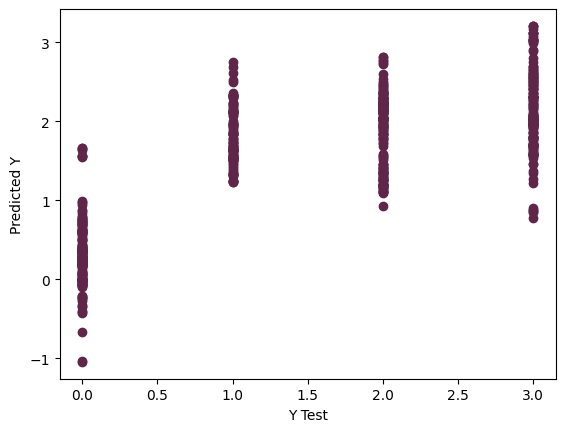

In [ ]:
#Plot the linear regression.

plt.scatter(x = y_test, y = predicted, color="#5F264A")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
#Importing Librairies
from sklearn import metrics
from math import sqrt

#Calculate Regression Acuracy to check how well our model fit our data

MAE = metrics.mean_absolute_error(y_test, predicted)
MSE = metrics.mean_squared_error(y_test, predicted)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, predicted)


#Printing our result
print("Results of sklearn.metrics:")
print('---------------------------')
print("MAE = ",MAE)
print('---------------------------')
print("MSE = ", MSE)
print('---------------------------')
print("RMSE = ", RMSE)
print('---------------------------')
print("r2 = ", r2)




Results of sklearn.metrics:
---------------------------
MAE =  0.5907905907501395
---------------------------
MSE =  0.5440150135281725
---------------------------
RMSE =  0.7375737342992716
---------------------------
r2 =  0.5923572821477656


###########################

In [ ]:
# Build and fit logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on test set
predicted = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

Accuracy: 0.6271428571428571


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# Build and fit logistic regression model with increased max_iter
# Build and fit logistic regression model
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)

# Predict on test set
predicted = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

Accuracy: 0.7214285714285714


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline with StandardScaler and LogisticRegression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on test set
predicted = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

Accuracy: 0.7214285714285714


In [ ]:
#Importing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       194
           1       0.62      0.59      0.60       124
           2       0.61      0.69      0.64       196
           3       0.67      0.60      0.63       186

    accuracy                           0.72       700
   macro avg       0.71      0.71      0.71       700
weighted avg       0.72      0.72      0.72       700



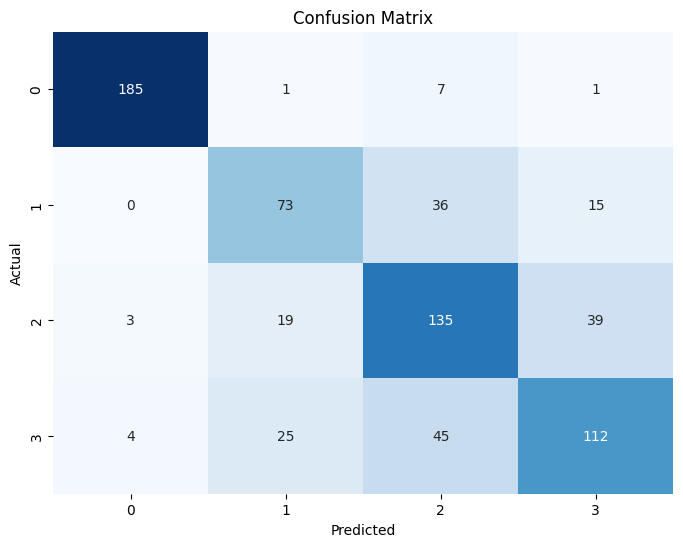

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#############################

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#Random Forest prediction
clf=RandomForestClassifier(n_estimators=10)
#Training our model
clf.fit(X_train, y_train)
#testing our model
y_pred=clf.predict(X_test)
#Check Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model


Accuracy: 0.8785714285714286


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
random_forest_classifier.fit(X_train, y_train)

# Plot one of the decision trees from the Random Forest
#plt.figure(figsize=(20,10))
#plot_tree(random_forest_classifier.estimators_[0], filled=True)
#plt.savefig('random_forest_classifier.pdf')
#plt.show()


RandomForestClassifier(random_state=42)

In [ ]:
# Plot confusion matrix
#cm = confusion_matrix(y_test, predicted)
#plt.figure(figsize=(8, 6))
#sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
#plt.xlabel("Predicted")
#plt.ylabel("Actual")
#plt.title("Confusion Matrix")
#plt.show()

In [ ]:
#Use confusion matrix to validate your model

#confusion_matrix

#confusion_matrix = pd.crosstab(y_test, predicted, rownames=['Actual'], colnames=['Predicted'])
#sns.heatmap(confusion_matrix, annot=True)

In [ ]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
# Train the classifier
rf_classifier.fit(X_train, y_train)
# Predict on the test set
predicted = rf_classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

Accuracy: 0.8971428571428571


In [ ]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the classifier
rf_classifier.fit(X_train, y_train)
# Predict on the test set
predicted = rf_classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)


Accuracy: 0.8942857142857142


############################

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=20) #what if we try 25

# Train the classifier
decision_tree_classifier.fit(X_train, y_train)

# Predict on the test set
predicted = decision_tree_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

Accuracy: 0.8814285714285715


#Perform training and Predictions

les hyperparamètres d'un classificateur de forêt aléatoire, y compris le critère de fractionnement, le nombre minimum d'échantillons requis pour diviser un nœud, la profondeur maximale d'un arbre, etc.

Ces valeurs spécifiques déterminent comment le classificateur de forêt aléatoire est entraîné et comment les arbres de décision individuels sont construits à chaque itération de l'algorithme. Voici une interprétation générale de ces valeurs :

criterion='gini' : Le critère utilisé pour mesurer la qualité de la division des nœuds. "Gini" est l'indice de Gini, une mesure de l'impureté des nœuds. Une valeur "gini" signifie que l'indice de Gini est utilisé comme critère de division.
min_samples_split=6 : Le nombre minimum d'échantillons requis pour qu'un nœud soit divisé en sous-nœuds. Dans ce cas, un nœud ne sera divisé que s'il contient au moins 6 échantillons.
min_samples_leaf=3 : Le nombre minimum d'échantillons requis pour qu'un nœud soit considéré comme une feuille (une feuille est un nœud terminal qui ne peut plus être divisé). Dans ce cas, chaque feuille devra contenir au moins 3 échantillons.
max_depth=24 : La profondeur maximale de chaque arbre de décision dans la forêt aléatoire. Dans ce cas, chaque arbre aura une profondeur maximale de 24 niveaux.
min_impurity_decrease=1.75642 : Le seuil d'impureté minimum requis pour qu'un nœud soit divisé. Si la division d'un nœud entraîne une diminution d'impureté inférieure à ce seuil, la division ne sera pas effectuée.
Ces paramètres influencent la structure et la performance du classificateur de forêt aléatoire. Ils sont ajustés lors du processus d'optimisation du modèle pour trouver la combinaison qui maximise les performances de prédiction sur les données d'entraînement.

#Others

In [ ]:
data.describe()

,Patient ID,Age,Time to Recurrence (months),Survival Time (months)
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,56.153000,11.575500,34.270000
std,577.494589,6.078492,7.708957,8.606343
min,1.000000,42.000000,0.000000,9.000000
25%,500.750000,51.000000,0.000000,28.000000
50%,1000.500000,56.000000,14.000000,36.000000
75%,1500.250000,61.000000,18.000000,42.000000
max,2000.000000,72.000000,36.000000,72.000000


In [ ]:
#Handling with Outliers in our Datasets using boxplot
# Box Plot
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Box(y=data['Time to Recurrence (months)'])) # if the series is part of dataframe, df

fig.show()






In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Box(y=data['Survival Time (months)'])) # if the series is part of dataframe, df

fig.show()

In [ ]:
#Handling with Outliers in our Datasets using boxplot
# Box Plot
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Box(y=data['Age'])) # if the series is part of dataframe, df

fig.show()


In [ ]:
# show the boolean dataframe
#print(" \nshow the boolean Dataframe : \n\n", data.isnull())

# Count total NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      data.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Patient ID                     0
Age                            0
Gender                         0
Tumor Type                     0
Tumor Grade                    0
Tumor Location                 0
Treatment                      0
Treatment Outcome              0
Time to Recurrence (months)    0
Recurrence Site                0
Survival Time (months)         0
dtype: int64


In [ ]:
null_data = data[data.isnull().any(axis=1)]
null_data

,Patient ID,Age,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome,Time to Recurrence (months),Recurrence Site,Survival Time (months)


In [ ]:
#If need test if missing values has only NaNs filter first all missing rows by x and then test if all values y are ap:

test = data.loc[data['Time to Recurrence (months)'].isna(), 'Recurrence Site'].eq('Glioblastoma', 'Meningioma').all()
test

True

In [ ]:

verify_df = data.loc[(data['Time to Recurrence (months)'] == 'NaN') & (data['Recurrence Site'] == 'NaN')]
verify_df

,Patient ID,Age,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome,Time to Recurrence (months),Recurrence Site,Survival Time (months)


#DATA_SET

In [ ]:
#Read the dataset
data_set = pd.read_csv("healthcare_dataset.csv")

In [ ]:
#Print out our Dataset
data_set

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [ ]:
#df_filtered= data.iloc[data['Age'] < 21]  # use operators like ==, >=, <, etc.
#data_set[["Blood Type", "Billing Amount"]].boxplot( by="Blood Type", return_type='both')


In [ ]:
pip install dash

In [ ]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)


app.layout = html.Div([
    html.H4("Analysis of the "),
    html.P("x-axis:"),
    dcc.Checklist(
        id='x-axis',
        options=['Gender', 'Tumor Type', 'Tumor Grade', 'Tumor Location'],
        value=['Age'],
        inline=True
    ),
    html.P("y-axis:"),
    dcc.RadioItems(
        id='y-axis',
        options=['Time to Recurrence (months)',	'Recurrence Site', 'Survival Time (months)'],
        value='Recurrence Site',
        inline=True
    ),
    dcc.Graph(id="graph"),
])

@app.callback(
    Output("graph", "figure"),
    Input("x-axis", "value"),
    Input("y-axis", "value"))

def generate_chart(x, y):
    fig = px.box(data, x=x, y=y)
    return fig


app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [ ]:
import streamlit as st
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder

# Assuming data_ is already defined

# Function to get unique values of a column
def get_unique_values(column):
    return data_[column].unique()

# Create select boxes for each column
selected_age = st.selectbox('Select Age', get_unique_values('Age'))
selected_gender = st.selectbox('Select Gender', get_unique_values('Gender'))
selected_tumor_type = st.selectbox('Select Tumor Type', get_unique_values('Tumor_Type'))
selected_tumor_grade = st.selectbox('Select Tumor Grade', get_unique_values('Tumor_Grade'))
selected_tumor_location = st.selectbox('Select Tumor Location', get_unique_values('Tumor_Location'))
selected_treatment = st.selectbox('Select Treatment', get_unique_values('Treatment'))
selected_time_to_recurrence = st.selectbox('Select Time to Recurrence', get_unique_values('Time_to_Recurrence'))
selected_recurrence_site = st.selectbox('Select Recurrence Site', get_unique_values('Recurrence_Site'))
selected_survival_time = st.selectbox('Select Survival Time (months)', get_unique_values('Survival_Time'))

if st.button('Predict Treatment Outcome'):
    # Handle Missing values by replacing with Full Recovery and 0
    missing_v = {'Recurrence Site': 'Full Recovery', 'Time_to_Recurrence': 0}
    data_ = data_.fillna(missing_v)

    # Initialize an ordinal encoder
    oe = OrdinalEncoder()

    # Encode selected values
    selected_values_encoded = {
        'Age': selected_age,
        'Gender': selected_gender,
        'Tumor Type': selected_tumor_type,
        'Tumor Grade': selected_tumor_grade,
        'Tumor Location': selected_tumor_location,
        'Treatment': selected_treatment,
        'Time to Recurrence (months)': selected_time_to_recurrence,
        'Recurrence Site': selected_recurrence_site,
        'Survival Time (months)': selected_survival_time
    }

    # Encode selected values
    for col in ['Age', 'Gender', 'Tumor_Type', 'Tumor_Grade', 'Tumor_Location', 'Treatment', 'Time_to_Recurrence', 'Recurrence_Site', 'Survival_Time']:
        # Check if the column is of object type (categorical)
        if data_[col].dtype == 'object':
            # Encode selected value
            encoded_value = oe.fit_transform([[selected_values_encoded[col]]])[0][0]
            selected_values_encoded[col] = encoded_value

    # Extract x and y from our data
    x = np.array(list(selected_values_encoded.values())).reshape(1, -1)
    y = data_['Treatment Outcome'].values

    # Create a Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
    # Train the classifier
    rf_classifier.fit(x, y)
    # Predict the treatment outcome
    predicted_outcome = rf_classifier.predict(x)

    st.write("Predicted Treatment Outcome:", predicted_outcome[0])